In [163]:
import pandas as pd

In [164]:
df = pd.read_csv("data/train/train.csv")

In [181]:
# 일단 임시로
df["time"] = pd.date_range("2015-12-1", "2018-12-30", freq="30T")[:52560]

In [182]:
df = df.drop(["Day","Hour","Minute"],1)

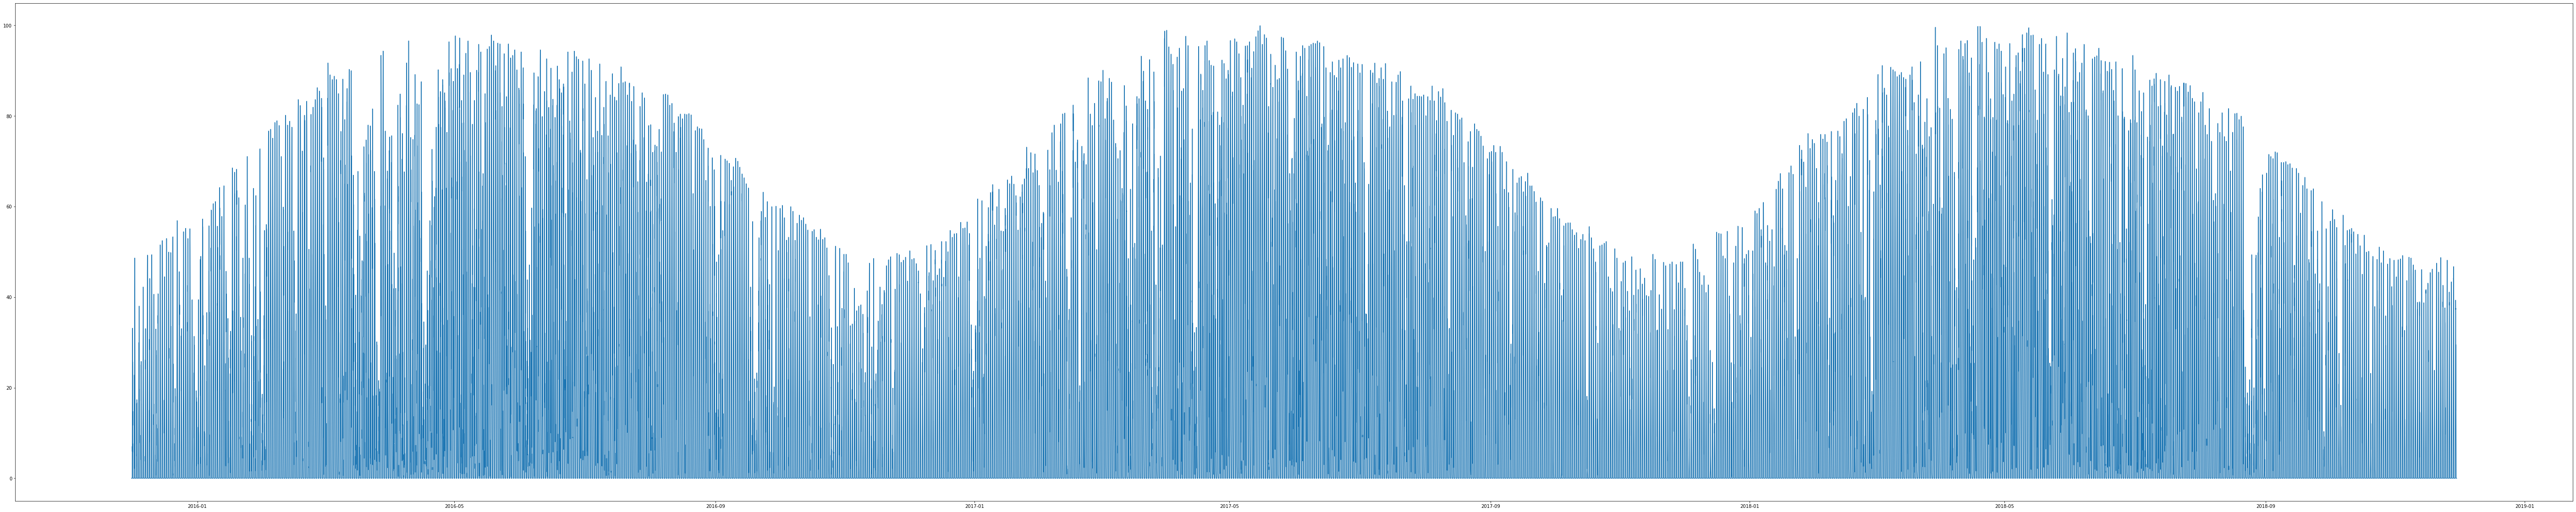

In [183]:
# 어느정도 경향성이 있어 보이지만
plt.figure(figsize = (100,20))

plt.plot(df["time"],df["TARGET"])

In [184]:
# linear regression

Text(0.5, 0, 'temp')

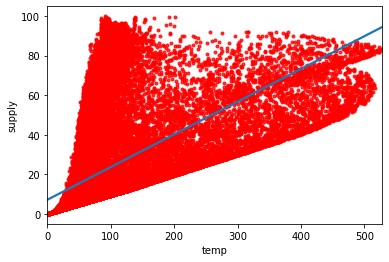

In [185]:
g=sns.regplot( df["DHI"], y, 
              ci=None, scatter_kws={'color': 'r', 's':9})
g.set_ylabel('supply')
g.set_xlabel('temp')

Text(0.5, 0, 'temp')

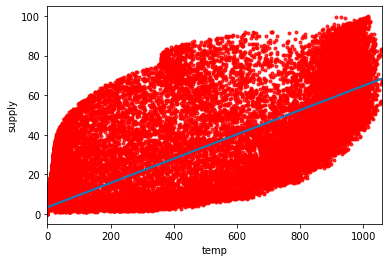

In [186]:
g=sns.regplot( df["DNI"], y, 
              ci=None, scatter_kws={'color': 'r', 's':9})
g.set_ylabel('supply')
g.set_xlabel('temp')

Text(0.5, 0, 'temp')

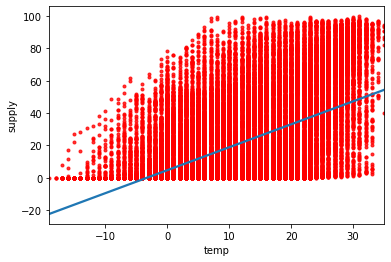

In [187]:
import seaborn as sns
g=sns.regplot( df["T"], y, 
              ci=None, scatter_kws={'color': 'r', 's':9})
g.set_ylabel('supply')
g.set_xlabel('temp')

Text(0.5, 0, 'temp')

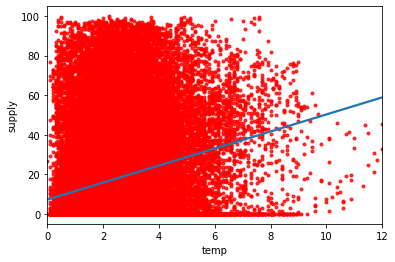

In [188]:
g=sns.regplot( df["WS"], y, 
              ci=None, scatter_kws={'color': 'r', 's':9})
g.set_ylabel('supply')
g.set_xlabel('temp')

Text(0.5, 0, 'temp')

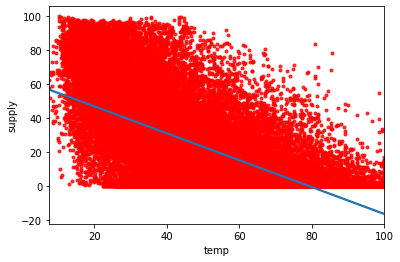

In [189]:
g=sns.regplot( df["RH"], y, 
              ci=None, scatter_kws={'color': 'r', 's':9})
g.set_ylabel('supply')
g.set_xlabel('temp')

In [196]:
# scaler 선택

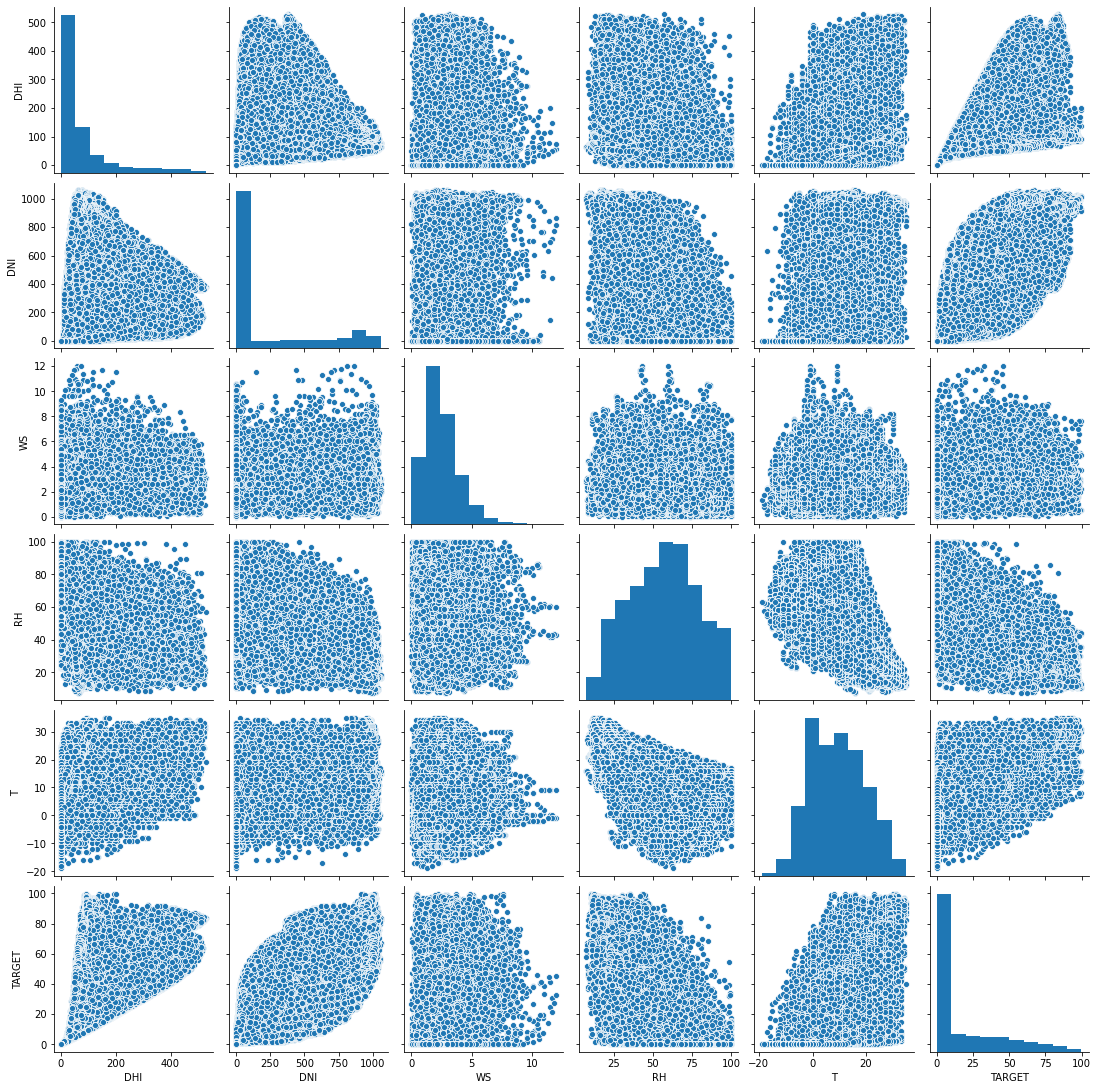

In [199]:
sns.pairplot(df)
# DHI , DNI 

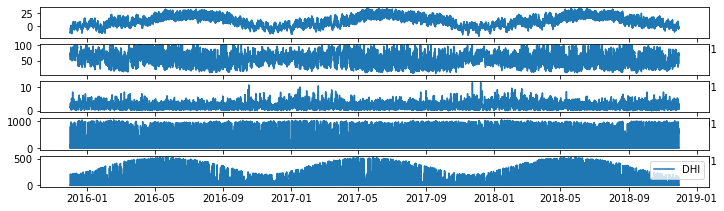

In [240]:
plt.rcParams['figure.figsize'] = [12, 4]
plt.subplot(6,1,1)
plt.plot(df.loc[:, 'time'], df.loc[:, 'T'], label='T')
plt.subplot(6,1,2)
plt.plot(df.loc[:, 'time'], df.loc[:, 'RH'], label='RH')
plt.subplot(6,1,3)
plt.plot(df.loc[:, 'time'], df.loc[:, 'WS'], label='WS')
plt.subplot(6,1,4)
plt.plot(df.loc[:, 'time'], df.loc[:, 'DNI'], label='DNI')
plt.subplot(6,1,5)
plt.plot(df.loc[:, 'time'], df.loc[:, 'DHI'], label='DHI',)
plt.legend()
plt.show()

In [242]:
df.head()

,DHI,DNI,WS,RH,T,TARGET,time
0,0,0,1.5,69.08,-12,0.0,2015-12-01 00:00:00
1,0,0,1.5,69.06,-12,0.0,2015-12-01 00:30:00
2,0,0,1.6,71.78,-12,0.0,2015-12-01 01:00:00
3,0,0,1.6,71.75,-12,0.0,2015-12-01 01:30:00
4,0,0,1.6,75.20,-12,0.0,2015-12-01 02:00:00


In [260]:
formula = ("(TARGET) ~ (DHI) + (DNI) + (WS) + (T)")

In [261]:
import statsmodels.api as sm
model = sm.OLS.from_formula(formula, data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.179e+05
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:41:06   Log-Likelihood:            -1.8490e+05
No. Observations:               52560   AIC:                         3.698e+05
Df Residuals:                   52555   BIC:                         3.699e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9593      0.077    -38.231      0.0

In [262]:
target = df
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(target, test_size=0.3, random_state=0)
df_train.shape, df_test.shape

((36792, 7), (15768, 7))

In [263]:
import numpy as np

In [264]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(target)):
    df_train = target.iloc[idx_train]
    df_test = target.iloc[idx_test]
    
    model = sm.OLS.from_formula(formula, data=target)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.TARGET - pred) ** 2).sum()
    tss = ((df_test.TARGET - df_test.TARGET.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.89969859, 검증 R2 = 0.90064450
학습 R2 = 0.89969859, 검증 R2 = 0.90140883
학습 R2 = 0.89969859, 검증 R2 = 0.89968087
학습 R2 = 0.89969859, 검증 R2 = 0.89713662
학습 R2 = 0.89969859, 검증 R2 = 0.89960869


In [265]:
model_real = sm.OLS.from_formula(formula, data=target)
result_real = model_real.fit()
print(result_real.summary())

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.179e+05
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:41:08   Log-Likelihood:            -1.8490e+05
No. Observations:               52560   AIC:                         3.698e+05
Df Residuals:                   52555   BIC:                         3.699e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9593      0.077    -38.231      0.0

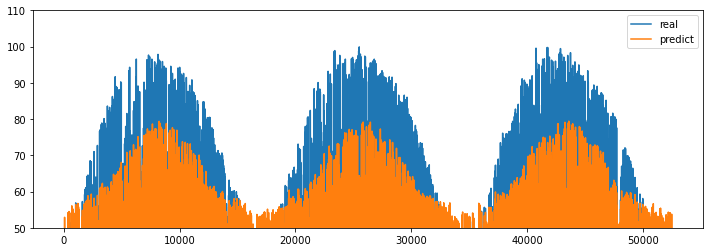

In [266]:
test2 = target
ypred = result_real.predict(test2)
plt.figure(facecolor="1")
plt.plot(test2["TARGET"],label='real')
plt.plot(ypred,label='predict')
plt.ylim(50,110)
plt.legend()
plt.show()